In [132]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_csv("YourCabs.csv")

In [134]:
data.head(50)

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,2,NaN,1021.0,1323.0,NaN,NaN,01-01-2013 22:30,0,0,01-01-2013 08:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,2,NaN,1192.0,832.0,NaN,NaN,01-01-2013 11:00,0,0,01-01-2013 09:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,2,NaN,516.0,376.0,NaN,NaN,01-01-2013 11:00,0,0,01-01-2013 09:49,13.005600,77.657990,12.902450,77.660810,0


In [135]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
travel_type_id             0
package_id             35881
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

<AxesSubplot:>

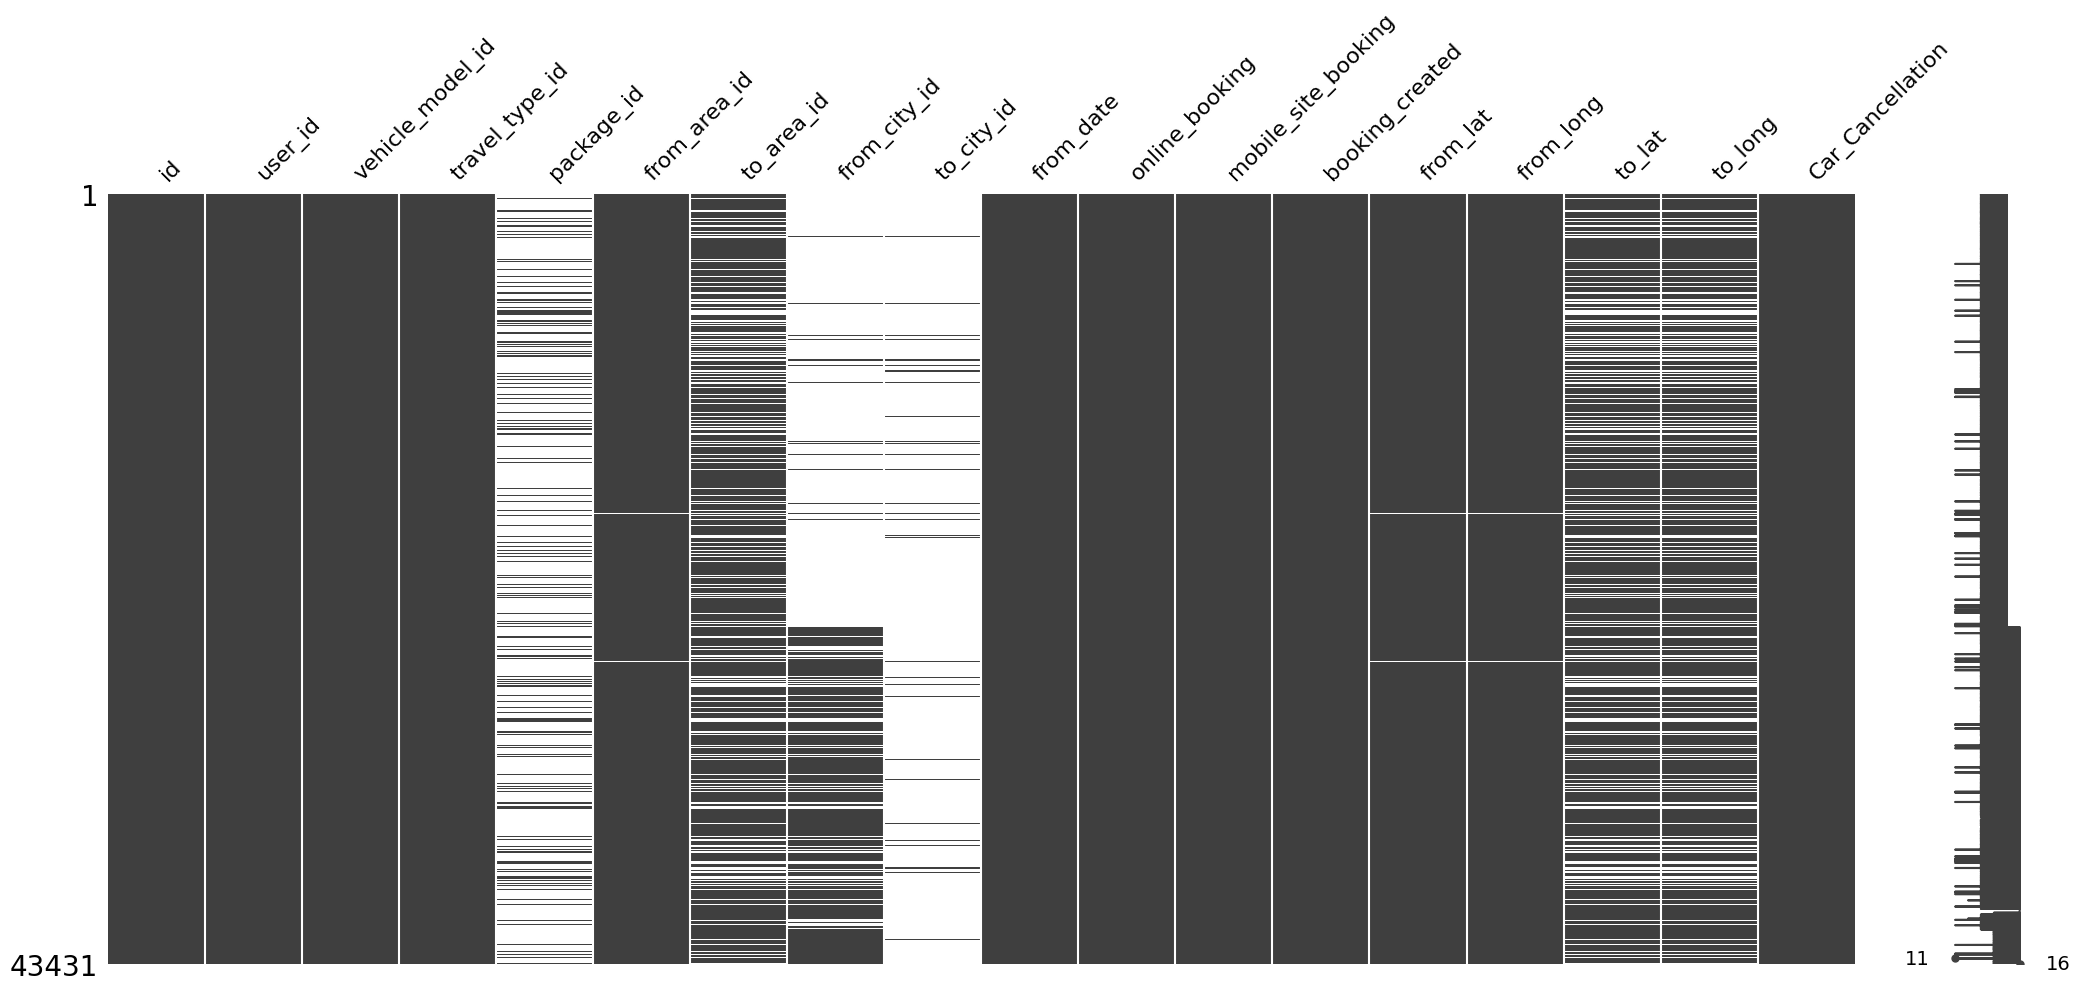

In [136]:
import missingno as msno
msno.matrix(data)

In [137]:
# to_lat and to_long are dropped due to almost NUll
data = data.drop(columns=['to_lat', "to_long"])

In [138]:
for i in ["travel_type_id", "online_booking", "mobile_site_booking", "Car_Cancellation"]:
    print(data[i].value_counts())

travel_type_id
2    34292
3     7550
1     1589
Name: count, dtype: int64
online_booking
0    28161
1    15270
Name: count, dtype: int64
mobile_site_booking
0    41553
1     1878
Name: count, dtype: int64
Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64


In [139]:
data['travel_type_id'].unique()

array([2, 1, 3], dtype=int64)

In [140]:
travel_type_group = {val: data[data['travel_type_id'] == val] for val in data['travel_type_id'].unique()}

In [141]:
travel_type_group[1].head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
6,132519,22172,12,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,0
17,132531,22189,24,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,0
24,132539,22192,54,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,0
158,132697,22275,28,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,0
216,132760,22310,87,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,0


In [142]:
travel_type_group[2].head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,0


In [143]:
travel_type_group[3].head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
8,132521,22182,65,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,0
20,132535,22190,87,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,0
23,132538,21995,12,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,0
34,132552,22201,12,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,0
47,132569,15846,12,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,0


## Working on Travel Type 1 data

In [144]:
df = travel_type_group[1]

In [145]:
df.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
6,132519,22172,12,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,0
17,132531,22189,24,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,0
24,132539,22192,54,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,0
158,132697,22275,28,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,0
216,132760,22310,87,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,0


<AxesSubplot:>

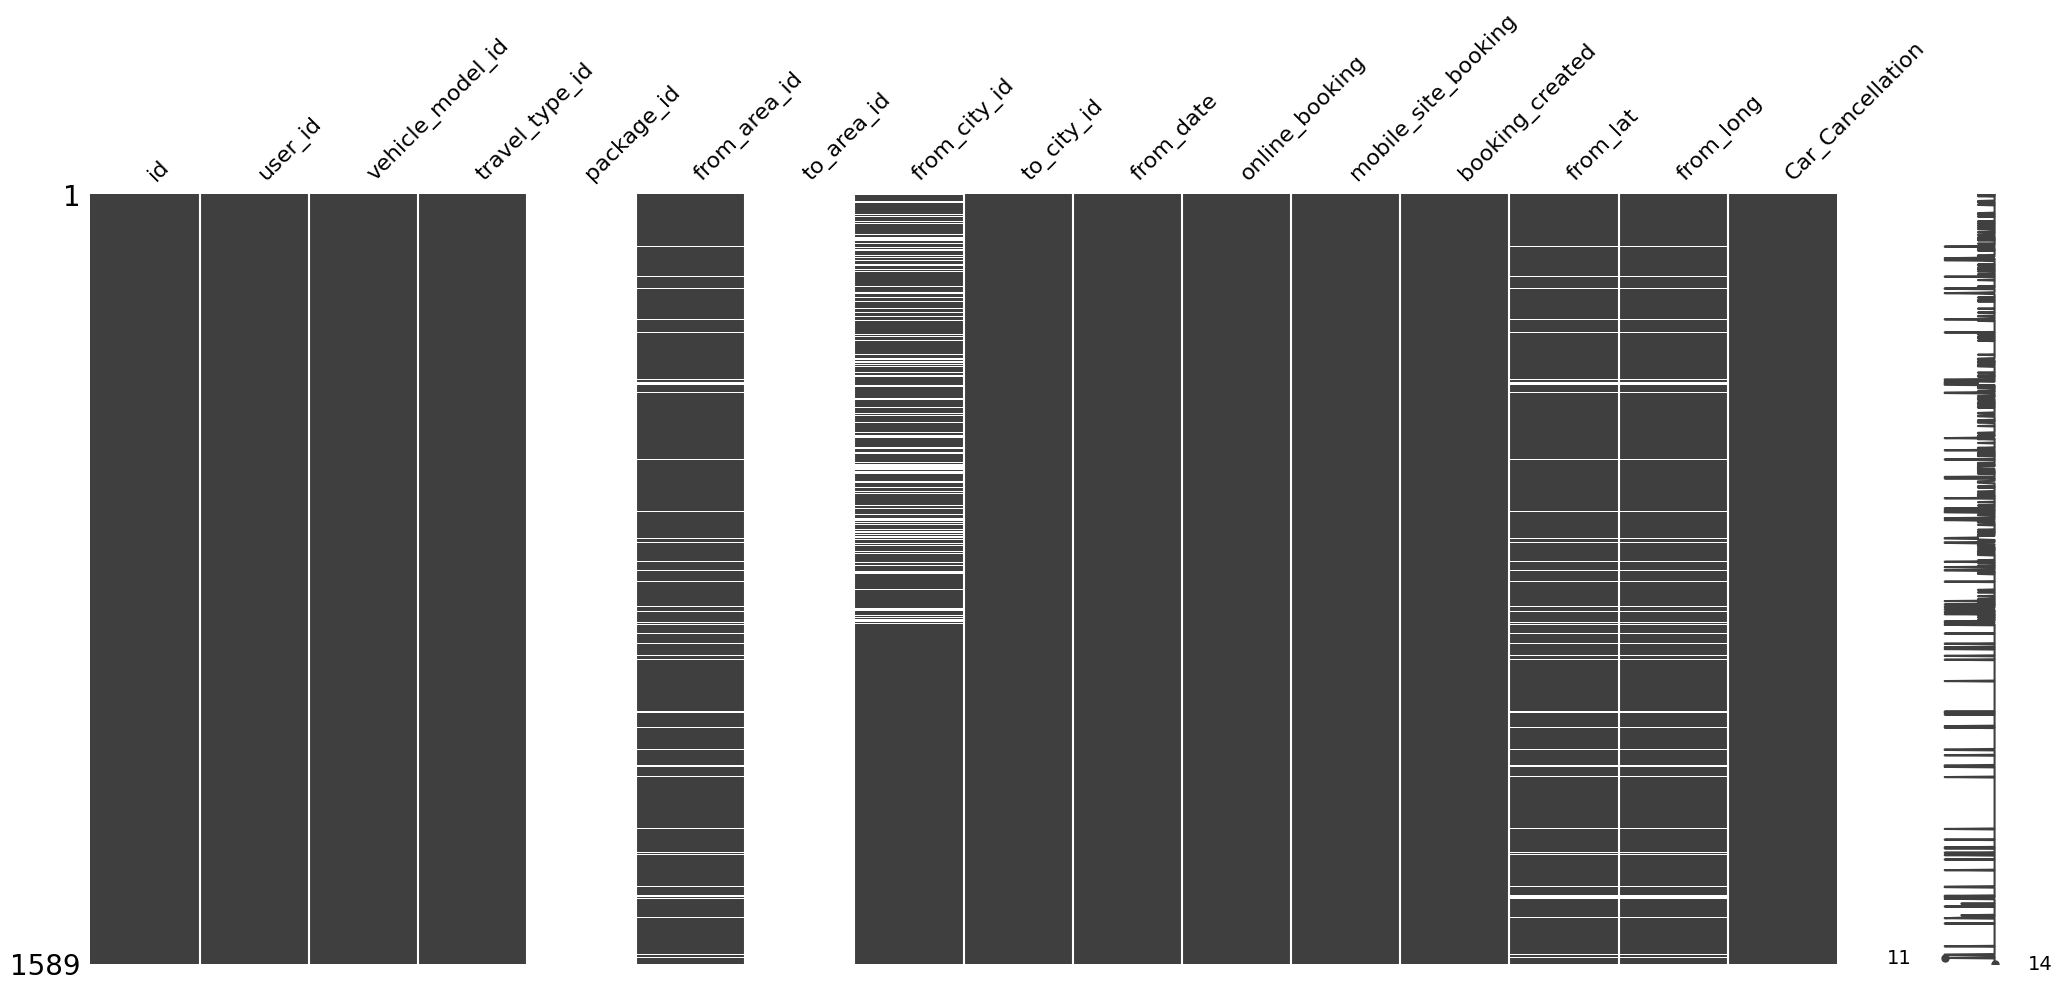

In [146]:
msno.matrix(df)

In [147]:
df = df.drop(columns=['package_id', 'from_area_id', 'to_area_id'])

<AxesSubplot:>

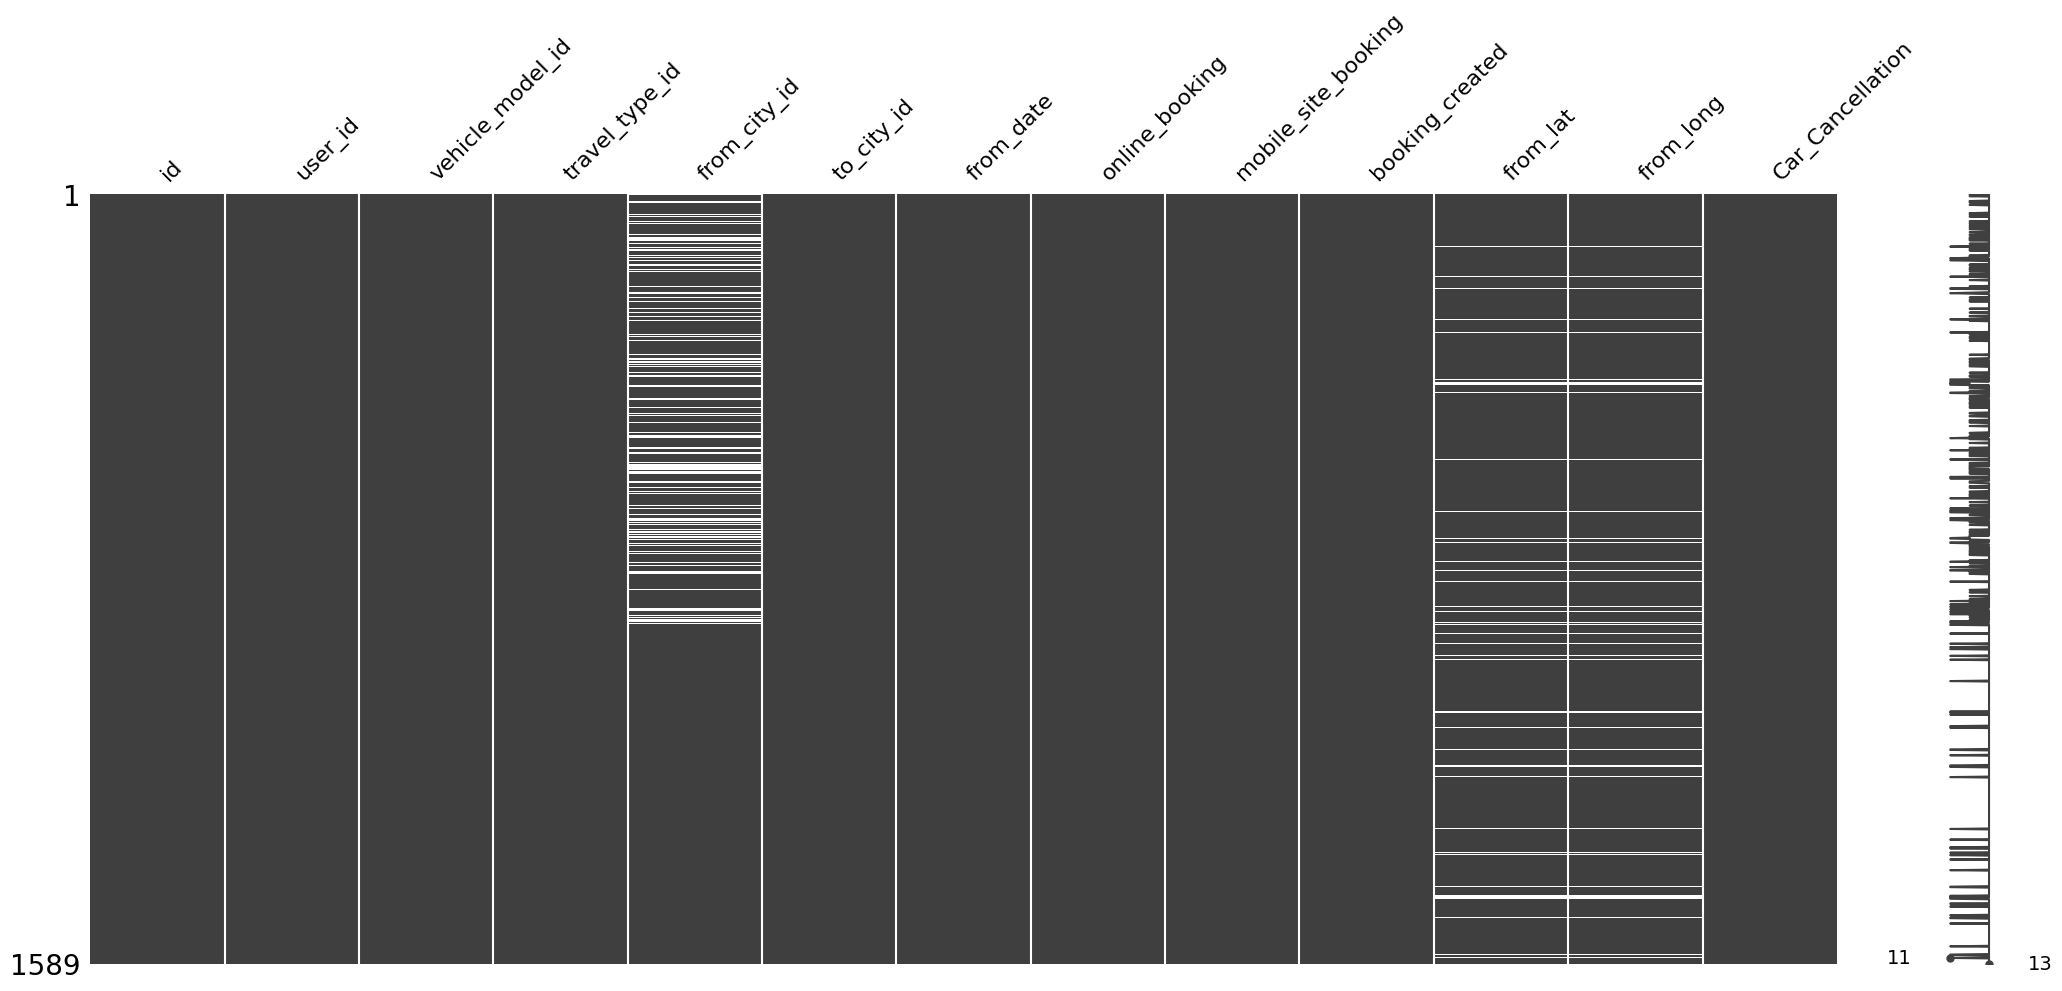

In [148]:
msno.matrix(df)

In [149]:
df['from_city_id'].value_counts()

from_city_id
15.0    1281
1.0      106
31.0       6
Name: count, dtype: int64

In [150]:
df['to_city_id'].value_counts()

to_city_id
32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
        ... 
88.0       1
169.0      1
139.0      1
137.0      1
50.0       1
Name: count, Length: 116, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1589 non-null   int64  
 1   user_id              1589 non-null   int64  
 2   vehicle_model_id     1589 non-null   int64  
 3   travel_type_id       1589 non-null   int64  
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  Car_Cancellation     1589 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 173.8+ KB


In [152]:
df['from_city_id'].fillna(df['from_city_id'].mode()[0], inplace=True)
df['to_city_id'].fillna(df['to_city_id'].mode()[0], inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1589 non-null   int64  
 1   user_id              1589 non-null   int64  
 2   vehicle_model_id     1589 non-null   int64  
 3   travel_type_id       1589 non-null   int64  
 4   from_city_id         1589 non-null   float64
 5   to_city_id           1589 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  Car_Cancellation     1589 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 173.8+ KB


<AxesSubplot:ylabel='from_lat'>

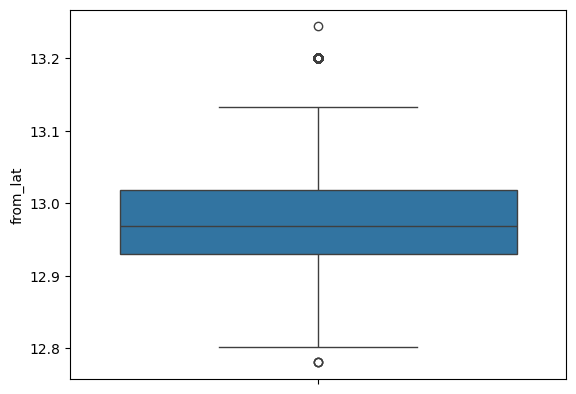

In [154]:
sns.boxplot(y="from_lat", data=df)

<AxesSubplot:ylabel='from_long'>

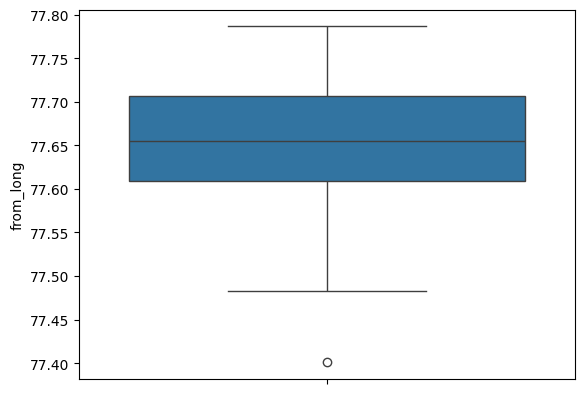

In [155]:
sns.boxplot(y="from_long", data=df)

In [156]:
df['from_lat'].fillna(df['from_lat'].median(), inplace=True)
df['from_long'].fillna(df['from_long'].median(), inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1589 non-null   int64  
 1   user_id              1589 non-null   int64  
 2   vehicle_model_id     1589 non-null   int64  
 3   travel_type_id       1589 non-null   int64  
 4   from_city_id         1589 non-null   float64
 5   to_city_id           1589 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1589 non-null   float64
 11  from_long            1589 non-null   float64
 12  Car_Cancellation     1589 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 173.8+ KB


In [158]:
df['booking_created'] = pd.to_datetime(df['booking_created'], format='mixed', errors='coerce')
df['from_date'] = pd.to_datetime(df['from_date'], format='mixed', errors='coerce')

df['booking_lead_time'] = (df['from_date'] - df['booking_created']).dt.total_seconds() / 3600  # in hours


In [159]:
df[df['booking_lead_time'] < 0]

,id,user_id,vehicle_model_id,travel_type_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,booking_lead_time
14303,150072,31262,24,1,15.0,32.0,2013-05-19 08:00:00,0,0,2013-05-19 15:42:00,12.982750,77.615820,0,-7.700000
35627,176332,43431,65,1,15.0,41.0,2013-09-30 06:45:00,0,0,2013-09-30 07:14:00,12.987445,77.616958,0,-0.483333
42618,184955,48094,87,1,15.0,32.0,2013-11-17 07:30:00,0,0,2013-11-17 08:34:00,12.972620,77.608832,0,-1.066667


In [160]:
# Dropping bad data, because booking creation cant take place after from_date
df = df[df['booking_lead_time'] >= 0]

In [161]:
df = df.drop(columns= ['travel_type_id', 'booking_created', 'from_date', 'id', 'user_id', 'vehicle_model_id'])

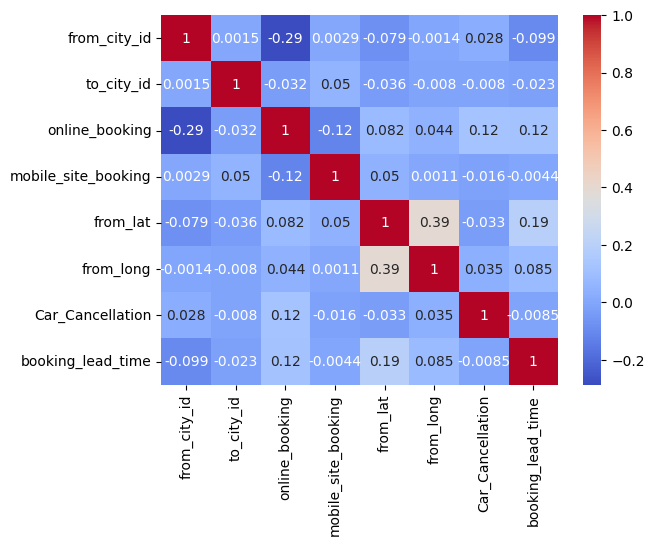

In [162]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Separate features and target
X = df.drop('Car_Cancellation', axis=1)
y = df['Car_Cancellation']

# 2. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Apply SMOTE to training set only
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [164]:
from imblearn.over_sampling import ADASYN
X_train_ada, y_train_ada = ADASYN(sampling_strategy=1.0).fit_resample(X_train, y_train)

In [165]:
from imblearn.combine import SMOTEENN
X_res, y_res = SMOTEENN().fit_resample(X_train, y_train)

In [166]:
X_train_smote.describe()

,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,booking_lead_time
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,14.594724,61.618967,0.659472,0.008793,12.973692,77.656520,35.460950
std,2.505895,44.278912,0.473981,0.093376,0.075077,0.046871,83.812649
min,1.000000,4.000000,0.000000,0.000000,12.780910,77.483730,0.066667
25%,15.000000,32.000000,0.000000,0.000000,12.931713,77.624396,5.934766
50%,15.000000,32.000000,1.000000,0.000000,12.956242,77.655822,9.803247
75%,15.000000,82.000000,1.000000,0.000000,12.978960,77.696420,23.054167
max,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,1477.183333


In [167]:
X_train_ada.describe()

,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,booking_lead_time
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,14.593750,61.987337,0.649439,0.008814,12.975177,77.657640,35.213391
std,2.508827,44.406209,0.477241,0.093488,0.074778,0.046679,84.197063
min,1.000000,4.000000,0.000000,0.000000,12.780910,77.483730,0.066667
25%,15.000000,32.000000,0.000000,0.000000,12.933973,77.625253,5.898870
50%,15.000000,32.000000,1.000000,0.000000,12.957837,77.658714,9.833333
75%,15.000000,82.817324,1.000000,0.000000,12.981485,77.696420,21.954299
max,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,1477.183333


In [168]:
X_res.describe()

,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,booking_lead_time
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,14.567129,61.492011,0.637840,0.007645,12.972823,77.657669,32.617365
std,2.516847,44.829249,0.480739,0.087119,0.072697,0.046483,87.779843
min,1.000000,4.000000,0.000000,0.000000,12.780910,77.483730,0.066667
25%,15.000000,32.000000,0.000000,0.000000,12.932071,77.626520,5.824125
50%,15.000000,32.000000,1.000000,0.000000,12.956516,77.658780,9.094026
75%,15.000000,74.255744,1.000000,0.000000,12.981266,77.696420,18.800000
max,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,1477.183333


In [169]:
y_train_ada.value_counts()

Car_Cancellation
0    1251
1    1245
Name: count, dtype: int64

In [170]:
y_train_smote.value_counts()

Car_Cancellation
0    1251
1    1251
Name: count, dtype: int64

In [171]:
y_res.value_counts()

Car_Cancellation
1    1091
0    1002
Name: count, dtype: int64

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [173]:
# Train and evaluate
def model_testing(model, x_train, y_train, x_test, y_test, threshold):
    print(f"\n🚀 Testing: {model.__class__.__name__}")

    model.fit(x_train, y_train)

    probs = model.predict_proba(x_test)[:, 1]
    y_pred = (probs >= threshold).astype(int)

    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))

In [174]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

model_testing(model, X_res, y_res, X_test, y_test, threshold=0.3)

# model_testing(model, X_train_smote, y_train_smote, X_test, y_test, threshold=0.3)

# model_testing(model, X_train_ada, y_train_ada, X_test, y_test, threshold=0.3)


🚀 Testing: XGBClassifier
📊 Confusion Matrix:
 [[289  25]
 [  2   2]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       314
           1       0.07      0.50      0.13         4

    accuracy                           0.92       318
   macro avg       0.53      0.71      0.54       318
weighted avg       0.98      0.92      0.94       318

✅ Accuracy: 0.9150943396226415


## Finalized Model for Travel Type 1

In [175]:
import joblib

joblib.dump(model, "travel_type_1.joblib")

['travel_type_1.joblib']

In [176]:
model = joblib.load('travel_type_1.joblib')

# probs = model.predict_proba(X_test)[:, 1]
# y_pred = (probs >= 0.3).astype(int)

y_pred = model.predict(X_test)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

📊 Confusion Matrix:
 [[293  21]
 [  2   2]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       314
           1       0.09      0.50      0.15         4

    accuracy                           0.93       318
   macro avg       0.54      0.72      0.56       318
weighted avg       0.98      0.93      0.95       318

✅ Accuracy: 0.9276729559748428


## Travel Type 2

In [177]:
df2 = travel_type_group[2]

In [178]:
df2.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,0


<AxesSubplot:>

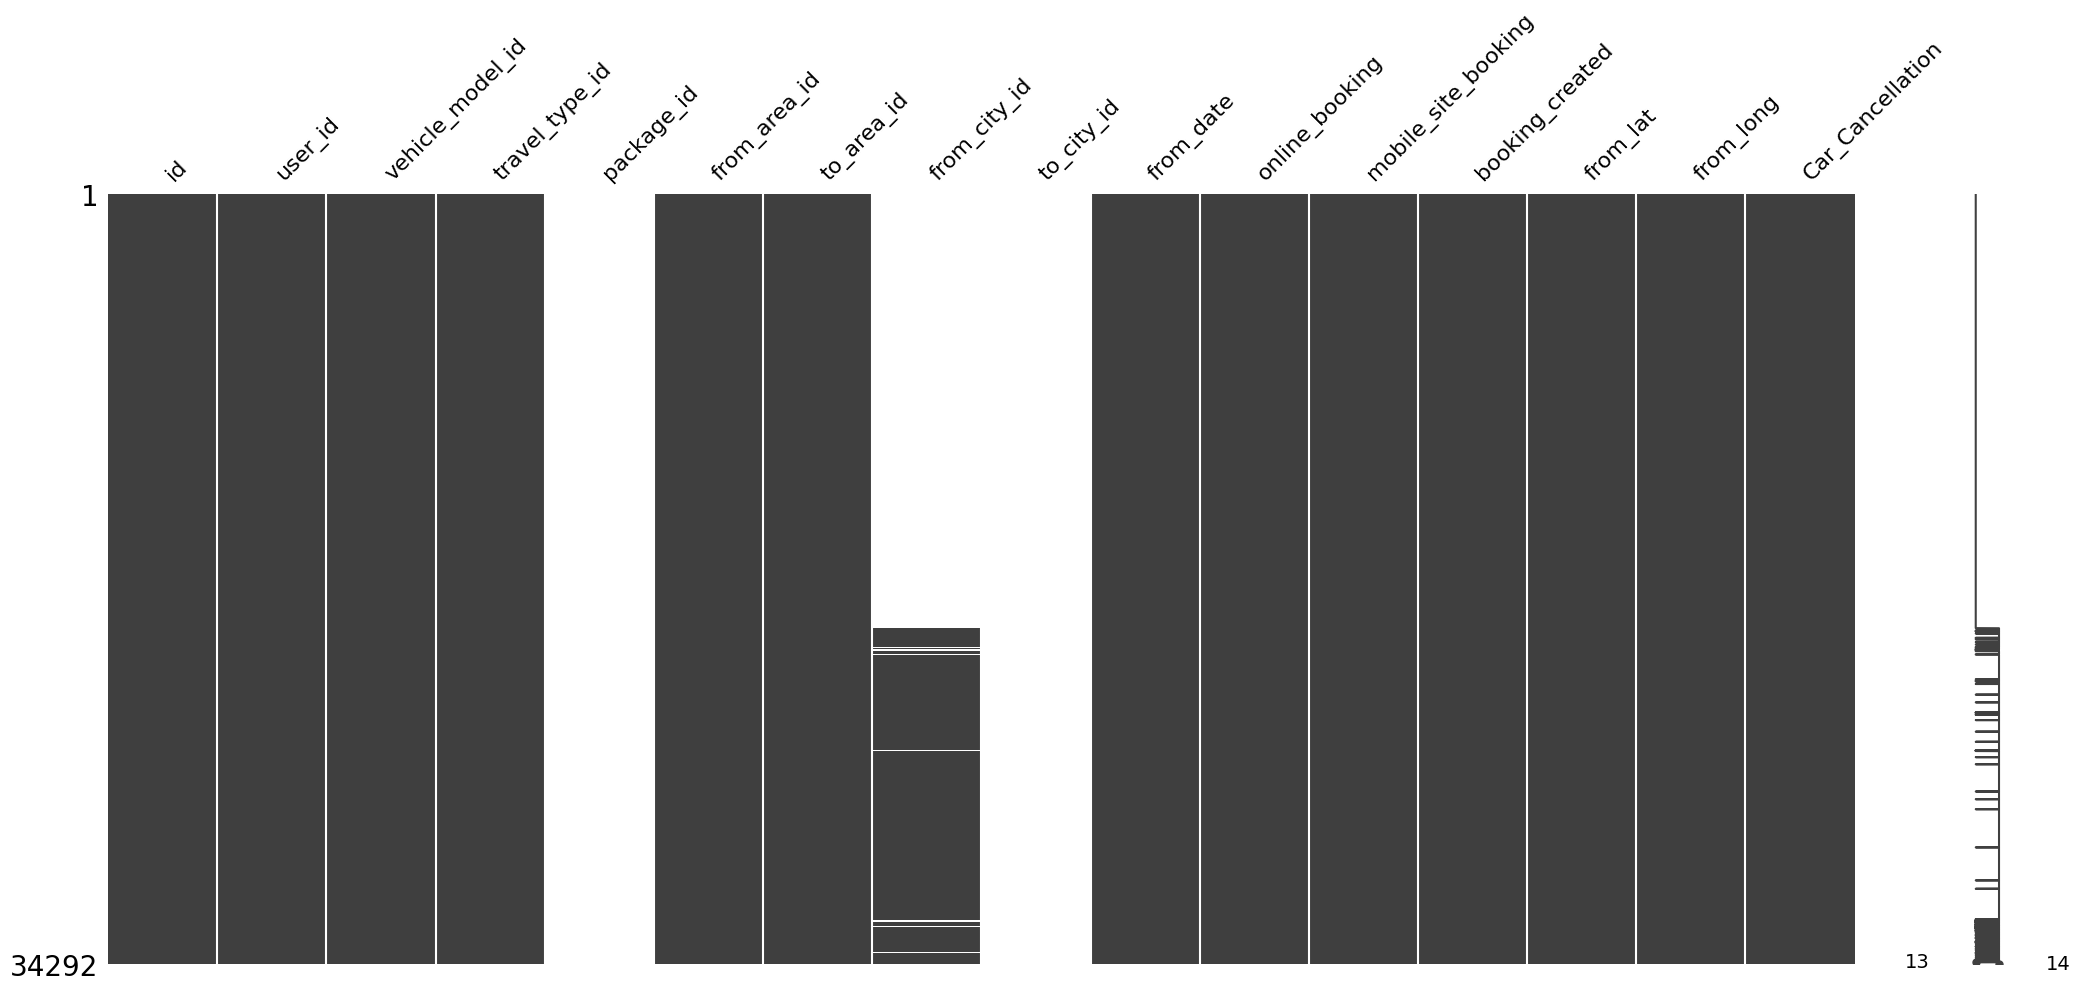

In [179]:
msno.matrix(df2)

In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34292 non-null  int64  
 1   user_id              34292 non-null  int64  
 2   vehicle_model_id     34292 non-null  int64  
 3   travel_type_id       34292 non-null  int64  
 4   package_id           0 non-null      float64
 5   from_area_id         34292 non-null  float64
 6   to_area_id           34292 non-null  float64
 7   from_city_id         14504 non-null  float64
 8   to_city_id           0 non-null      float64
 9   from_date            34292 non-null  object 
 10  online_booking       34292 non-null  int64  
 11  mobile_site_booking  34292 non-null  int64  
 12  booking_created      34292 non-null  object 
 13  from_lat             34292 non-null  float64
 14  from_long            34292 non-null  float64
 15  Car_Cancellation     34292 non-null  int6

In [181]:
df2['Car_Cancellation'].value_counts()

Car_Cancellation
0    31517
1     2775
Name: count, dtype: int64

In [182]:
df2['booking_created'] = pd.to_datetime(df2['booking_created'], format='mixed', errors='coerce')
df2['from_date'] = pd.to_datetime(df2['from_date'], format='mixed', errors='coerce')

df2['booking_lead_time'] = (df2['from_date'] - df2['booking_created']).dt.total_seconds() / 3600  # in hours

In [183]:
df2[df2['booking_lead_time'] < 0]

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,booking_lead_time
6284,140211,26154,23,2,NaN,1263.0,393.0,NaN,NaN,2013-03-06 12:45:00,0,0,2013-03-06 12:52:00,12.968970,77.594560,0,-0.116667
6496,140475,26277,12,2,NaN,1393.0,115.0,NaN,NaN,2013-03-08 18:30:00,0,0,2013-03-08 19:06:00,13.199660,77.706880,0,-0.600000
8561,142956,27327,85,2,NaN,136.0,455.0,NaN,NaN,2013-03-31 15:00:00,0,0,2013-03-31 15:56:00,12.907960,77.624180,0,-0.933333
9100,143622,27860,12,2,NaN,1286.0,393.0,NaN,NaN,2013-04-06 10:00:00,0,0,2013-04-06 10:43:00,12.973448,77.620320,0,-0.716667
9298,143872,29827,12,2,NaN,1152.0,393.0,NaN,NaN,2013-04-08 13:00:00,0,0,2013-04-08 15:08:00,12.871530,77.602060,0,-2.133333
9416,144013,28056,12,2,NaN,393.0,1010.0,NaN,NaN,2013-04-09 19:30:00,0,0,2013-04-09 19:39:00,13.199560,77.706880,0,-0.150000
9858,144545,28380,12,2,NaN,393.0,1264.0,NaN,NaN,2013-04-13 16:15:00,0,0,2013-04-13 16:18:00,13.199560,77.706880,0,-0.050000
9911,144613,19875,28,2,NaN,1084.0,393.0,NaN,NaN,2013-04-14 07:00:00,0,0,2013-04-14 07:04:00,12.892657,77.581866,0,-0.066667
10276,145055,28516,28,2,NaN,585.0,832.0,NaN,NaN,2013-04-17 00:00:00,0,0,2013-04-17 22:54:00,12.976770,77.572700,0,-22.900000
12632,147962,30141,12,2,NaN,1320.0,1393.0,NaN,NaN,2013-05-07 17:30:00,0,0,2013-05-07 17:53:00,12.840674,77.659660,0,-0.383333


In [184]:
df2 = df2[df2['booking_lead_time'] >= 0]

In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34267 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   34267 non-null  int64         
 1   user_id              34267 non-null  int64         
 2   vehicle_model_id     34267 non-null  int64         
 3   travel_type_id       34267 non-null  int64         
 4   package_id           0 non-null      float64       
 5   from_area_id         34267 non-null  float64       
 6   to_area_id           34267 non-null  float64       
 7   from_city_id         14500 non-null  float64       
 8   to_city_id           0 non-null      float64       
 9   from_date            34267 non-null  datetime64[ns]
 10  online_booking       34267 non-null  int64         
 11  mobile_site_booking  34267 non-null  int64         
 12  booking_created      34267 non-null  datetime64[ns]
 13  from_lat             34267 non-null 

In [186]:
df2 = df2.drop(columns=['package_id', 'from_city_id', 'to_city_id', 'id', 'user_id', 'vehicle_model_id', 'from_date', 'booking_created', 'travel_type_id'])

In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34267 entries, 0 to 43430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34267 non-null  float64
 1   to_area_id           34267 non-null  float64
 2   online_booking       34267 non-null  int64  
 3   mobile_site_booking  34267 non-null  int64  
 4   from_lat             34267 non-null  float64
 5   from_long            34267 non-null  float64
 6   Car_Cancellation     34267 non-null  int64  
 7   booking_lead_time    34267 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.4 MB


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd

# ✅ Step 1: Label encode ID columns
df2['from_area_id'] = df2['from_area_id'].astype('int').astype('category')
df2['to_area_id'] = df2['to_area_id'].astype('int').astype('category')

le_from = LabelEncoder()
le_to = LabelEncoder()
df2['from_area_id'] = le_from.fit_transform(df2['from_area_id'])
df2['to_area_id'] = le_to.fit_transform(df2['to_area_id'])

# 🧪 Step 2: Train-test split (before SMOTEENN)
X = df2.drop(columns=['Car_Cancellation'])
y = df2['Car_Cancellation']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📊 Step 3: Define models
models = {
    "Logistic Regression": Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ]),
    
    "Decision Tree": Pipeline([
        ('clf', DecisionTreeClassifier(class_weight='balanced', max_depth=10))
    ]),
    
    "Random Forest": Pipeline([
        ('clf', RandomForestClassifier(class_weight='balanced', n_estimators=100))
    ]),
    
    "XGBoost": Pipeline([
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()))
    ])
}

# 🧬 Step 4: Apply SMOTEENN and evaluate
from collections import defaultdict
scores = defaultdict(dict)

for name, pipeline in models.items():
    print(f"\n⚔️ Training {name}...")

    model_pipeline = ImbPipeline([
        ('smoteen', SMOTEENN(random_state=42)),
        ('model', pipeline)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # print(classification_report(y_test, y_pred, digits=4))
    # print(f"🔥 {name} F1-score: {f1:.4f}")
    # scores[name] = f1

    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))



⚔️ Training Logistic Regression...
📊 Confusion Matrix:
 [[3657 2642]
 [ 189  366]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72      6299
           1       0.12      0.66      0.21       555

    accuracy                           0.59      6854
   macro avg       0.54      0.62      0.46      6854
weighted avg       0.88      0.59      0.68      6854

✅ Accuracy: 0.5869565217391305

⚔️ Training Decision Tree...
📊 Confusion Matrix:
 [[4502 1797]
 [ 171  384]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82      6299
           1       0.18      0.69      0.28       555

    accuracy                           0.71      6854
   macro avg       0.57      0.70      0.55      6854
weighted avg       0.90      0.71      0.78      6854

✅ Accuracy: 0.7128683980157572

⚔️ Training Random Forest...
📊 Confusion Matrix:
 [[5261 1038]
 [ 2

In [189]:
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Get predicted probabilities
probs = model_pipeline.predict_proba(X_test)[:, 1]

# Find best threshold
best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.1, 0.9, 0.01):
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n🔥 Best Threshold: {best_thresh:.2f} | F1 Score: {best_f1:.4f}")

# Final predictions
y_thresh_pred = (probs >= best_thresh).astype(int)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_thresh_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_thresh_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_thresh_pred))



🔥 Best Threshold: 0.86 | F1 Score: 0.3106
📊 Confusion Matrix:
 [[5037 1262]
 [ 221  334]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6299
           1       0.21      0.60      0.31       555

    accuracy                           0.78      6854
   macro avg       0.58      0.70      0.59      6854
weighted avg       0.90      0.78      0.83      6854

✅ Accuracy: 0.7836299970819959


In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN

# 👇 Adjust this if your RF pipeline is named differently
rf_pipeline = ImbPipeline([
    ('smoteen', SMOTEENN(random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
}

grid = GridSearchCV(
    rf_pipeline,
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("\n✅ Best F1 Score:", grid.best_score_)
print("🏆 Best Params:", grid.best_params_)

# Save best model for threshold tuning
best_model_pipeline = grid.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Best F1 Score: 0.31506951080330026
🏆 Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [192]:
probs = best_model_pipeline.predict_proba(X_test)[:, 1]

best_f1 = 0
best_thresh = 0.5

for t in np.arange(0.1, 0.9, 0.01):
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n🔥 Final Best Threshold: {best_thresh:.2f} | F1 Score: {best_f1:.4f}")

y_final = (probs >= best_thresh).astype(int)
# print("\n📊 Final Classification Report:\n")
# print(classification_report(y_test, y_final, digits=4))

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_final))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_final))
print("✅ Accuracy:", accuracy_score(y_test, y_final))



🔥 Final Best Threshold: 0.58 | F1 Score: 0.3178
📊 Confusion Matrix:
 [[5462  837]
 [ 292  263]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      6299
           1       0.24      0.47      0.32       555

    accuracy                           0.84      6854
   macro avg       0.59      0.67      0.61      6854
weighted avg       0.89      0.84      0.86      6854

✅ Accuracy: 0.8352786693901372


## Finalized Model for Travel Type 2

In [193]:
import joblib
joblib.dump(best_model_pipeline, "travel_type_2.joblib")

['travel_type_2.joblib']

In [205]:
model = joblib.load("travel_type_2.joblib")
probs = model.predict_proba(X_test)[:, 1]
preds = (probs >= 0.58).astype(int)

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("\n🔍 Classification Report:\n", classification_report(y_test, preds))
print("✅ Accuracy:", accuracy_score(y_test, preds))

📊 Confusion Matrix:
 [[5462  837]
 [ 292  263]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      6299
           1       0.24      0.47      0.32       555

    accuracy                           0.84      6854
   macro avg       0.59      0.67      0.61      6854
weighted avg       0.89      0.84      0.86      6854

✅ Accuracy: 0.8352786693901372


## Travel Type 3